<a href="https://colab.research.google.com/github/YokoSSS/ProgrammingPython/blob/OUJ_%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E5%85%A5%E9%96%80%EF%BC%B0%EF%BD%99%EF%BD%94%EF%BD%88%EF%BD%8F%EF%BD%8E%EF%BC%88'24%EF%BC%89/%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E5%85%A5%E9%96%80%EF%BC%B0%EF%BD%99%EF%BD%94%EF%BD%88%EF%BD%8F%EF%BD%8E%EF%BC%88'24%EF%BC%89_84_WebAPI%E3%81%AE%E5%88%A9%E7%94%A8_%E6%97%A5%E6%9C%AC%E9%8A%80%E8%A1%8C_%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E5%85%A5%E9%96%80Python24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8章 シミュレーション・WebAPIの利用

 * 左上の「ファイル」を開いて、「ドライブにコピーを保存」をしてください。
 * 自分のGoogleドライブに、そのファイルが保存されます。ファイル名は「のコピー」が、最後（右端）についています。それを利用して学習・演習を進めて下さい。

# 8.4 WebAPIの利用 日本銀行

## CSVの利用(2) 日本銀行の為替データ

日本銀行では、為替データをインターネットを利用して公開している。

* https://www.stat-search.boj.or.jp/

ここでは、過去の1ドルの価格（円）がどのように推移しているかについて、日本銀行のサイトからCSV形式のデータを取得し、それをグラフにすることを考える。

1. データの入手と吟味

* 目的となるデータのURLは、日本銀行のサイト( https://www.stat-search.boj.or.jp/ )で探すと、次のものが見つかる。
  * https://www.stat-search.boj.or.jp/ssi/mtshtml/fm08_m_1.html
  * https://www.stat-search.boj.or.jp/ssi/mtshtml/csv/fm08_m_1.csv
* いったん、上記のうち CSV ファイルをダウンロードし、中身を表計算ソフトなどで開いてみる。

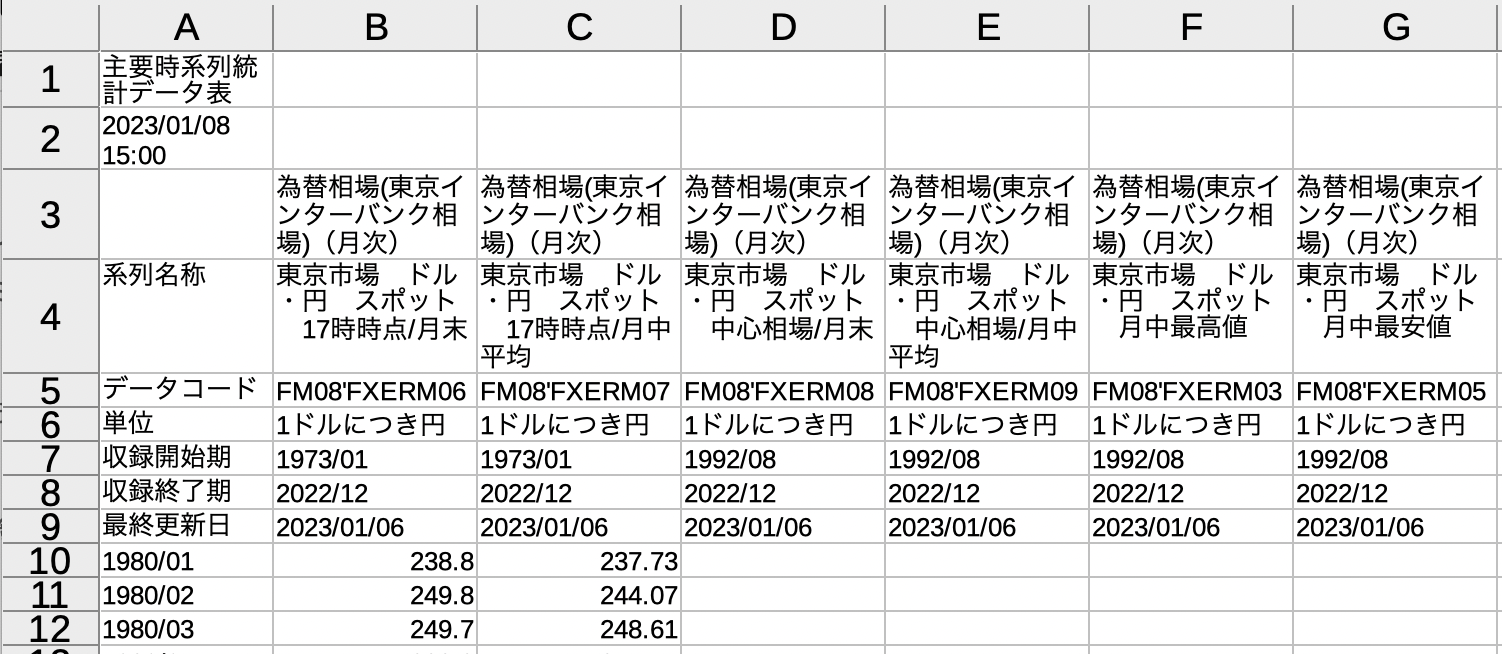

  * 4行目と、10行目以降がデータとして重要で、他の行は不要。
    * 冒頭を0行目と数えるなら、0, 1, 2, 4, 5, 6, 7, 8 を読み飛ばす
  * 年・月と、月中平均だけあればいいので、1列目と3列目だけ利用する。
    * 冒頭を0列目と数えるなら、 0, 2 列目を利用する。
  * 見出しは、1列目
    * 冒頭を0列目と数えるなら、 0列目が見出し。

2. まず、データ分析用の pandas と、matplotlib 、および日本語文字を取り扱う準備をする。

【プログラム8401-1】

In [1]:
import pandas as pd # データフレームの解析
import matplotlib.pyplot as plt
# japanize-matplotlib は、matplotlib のグラフで日本語の文字を使うためのものである。
!pip install japanize-matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=67e22bf84f7d119651878c5475ab970d3fb98ee6bb93eff16deb629af74dc2f2
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


3. プログラムを作成する

* pd.read_csv を利用してデータフレームを作る。
    * pd.read_csv(CSVファイル名あるいはURL)
* 4行目と、10行目以降がデータとして重要で、他の行は不要。
    * 冒頭を0行目と数えるなら、0, 1, 2, 4, 5, 6, 7, 8 を読み飛ばす
        * skiprows = [0, 1, 2, 4, 5, 6, 7, 8] と指定する。
* 月名と、平均だけあればいいので、1列目と3列目だけ利用する。
    * 冒頭を0列目と数えるなら、 0, 2 列目を利用する。
        *  usecols = [0, 2] と指定する。
* 見出しは、1列目
    * 冒頭を0列目と数えるなら、 0列目が見出し。
        * index_col = 0 と指定する。

以上のもとにデータを読み込み、冒頭5件を確認しておく。

【プログラム8401-2】

In [2]:
df = pd.read_csv(
    "https://www.stat-search.boj.or.jp/ssi/mtshtml/csv/fm08_m_1.csv",
    encoding = 'sjis', # 文字コードは sjis と指定した
    skiprows = [0, 1, 3, 4, 5, 6, 7, 8],
    usecols = [0, 2],
    index_col = 0
    )

df[:5] # 冒頭5件を確認

,為替相場(東京インターバンク相場)（月次）.1
1980/01,237.73
1980/02,244.07
1980/03,248.61
1980/04,251.45
1980/05,228.06


3. 大丈夫そうなので、データをグラフ化する。

【プログラム8401-3】

<Axes: >

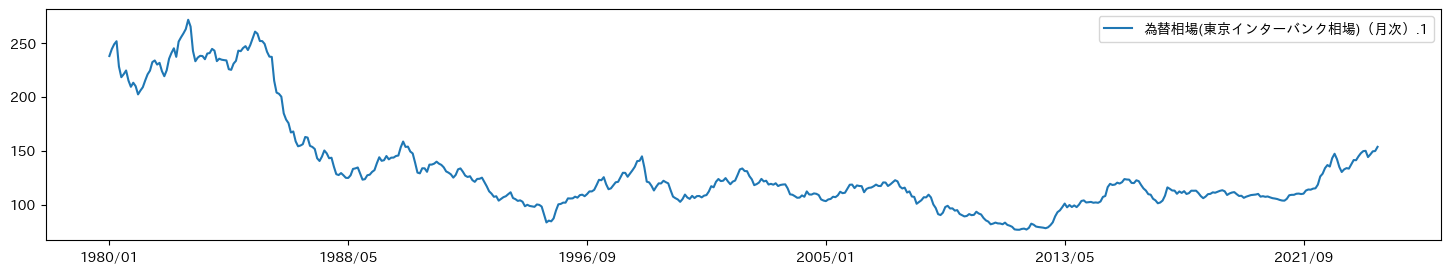

In [3]:
df.plot(figsize=(18, 3))

# 次の教材

8.5 WebAPIの利用 千葉市立図書館
* https://colab.research.google.com/drive/1zmEAv1b8rnXW53ZasxnTJKYZrCL_XWpy